In [9]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams["font.size"] = 20

mpl.rcParams['xtick.direction'] = 'in'  # 将 x-axis 的刻度线方向设置向内
mpl.rcParams['ytick.direction'] = 'in'  # 将 y-axis 的刻度线方向设置向内

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams["legend.markerscale"] = 1

In [10]:
data = pd.read_csv("FLFE-OriginalBox.csv")
data = data[["lattice_name", "v_max^-1",
             "CPP F_excess^N", "CPP F_excess^N std",
             "paper F_excess^N", "paper F_excess^N error"]]

data

,lattice_name,v_max^-1,CPP F_excess^N,CPP F_excess^N std,paper F_excess^N,paper F_excess^N error
0,fcc 3x3x6,0.041968,5.875640,0.002138,5.8766,0.0039
1,fcc 3x3x12,0.041968,5.871966,0.002050,5.8777,0.0008
2,fcc 3x4x6,0.027259,5.891470,0.002323,5.8912,0.0028
3,fcc 4x4x6,0.017705,5.904431,0.001956,5.9047,0.0030
4,fcc 4x4x12,0.017705,5.905989,0.001505,5.9030,0.0030
5,fcc 6x6x6,0.006260,5.915224,0.001137,5.9159,0.0010
6,fcc cubic 2,0.032527,5.860467,0.003981,5.8644,0.0030
7,fcc cubic 3,0.009638,5.912437,0.001295,5.9117,0.0030
8,fcc cubic 4,0.004066,5.918467,0.001528,5.9208,0.0021


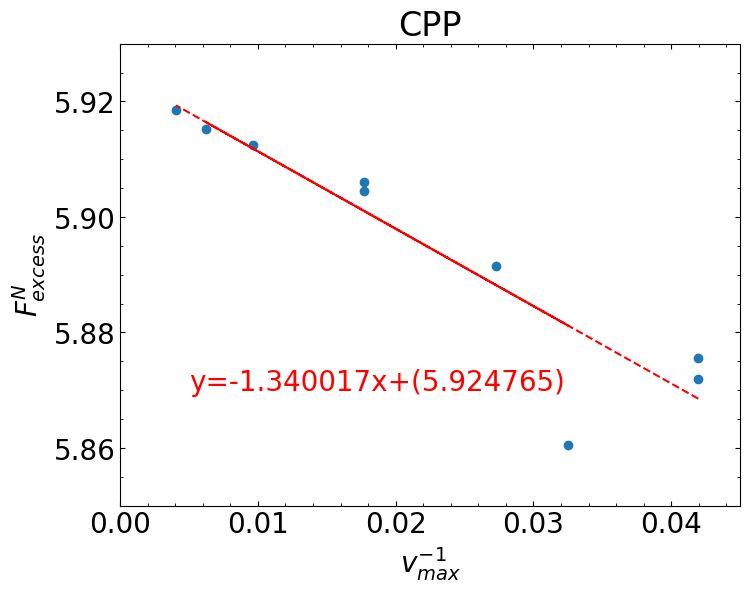

In [11]:
# FLFE-OriginalBox plot1
fig, axs = plt.subplots(figsize=(8, 6))

axs.set_title('CPP')
axs.set_xlim(0, 0.045)
axs.set_ylim(5.85, 5.93)
axs.set_xlabel('$v_{max}^{-1}$')
axs.set_ylabel('$F_{excess}^{N}$')

axs.scatter(
    data["v_max^-1"].values.tolist(),
    data["CPP F_excess^N"].values.tolist()
)

z = np.polyfit(data["v_max^-1"], data["CPP F_excess^N"], 1)
p = np.poly1d(z)
axs.plot(data["v_max^-1"], p(data["v_max^-1"]), "r--")
axs.text(0.005, 5.87, "y=%.6fx+(%.6f)" % (z[0], z[1]), fontsize=20, color="r")

# plt.legend(loc='lower left')
plt.show()
# plt.savefig("FLFE-OriginalBox-cpp.svg", bbox_inches='tight', format="svg")

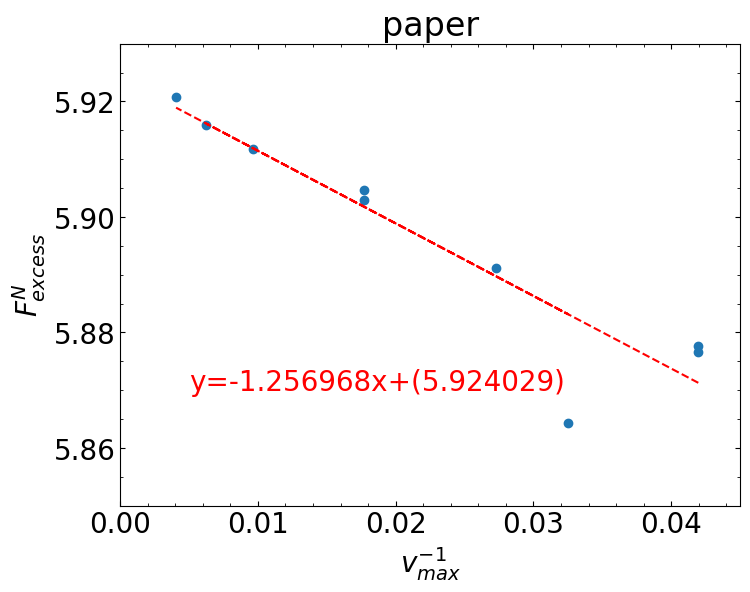

In [12]:
# FLFE-OriginalBox plot2
fig, axs = plt.subplots(figsize=(8, 6))

axs.set_title('paper')
axs.set_xlim(0, 0.045)
axs.set_ylim(5.85, 5.93)
axs.set_xlabel('$v_{max}^{-1}$')
axs.set_ylabel('$F_{excess}^{N}$')

axs.scatter(
    data["v_max^-1"].values.tolist(),
    data["paper F_excess^N"].values.tolist()
)

z = np.polyfit(data["v_max^-1"], data["paper F_excess^N"], 1)
p = np.poly1d(z)
axs.plot(data["v_max^-1"], p(data["v_max^-1"]), "r--")
axs.text(0.005, 5.87, "y=%.6fx+(%.6f)" % (z[0], z[1]), fontsize=20, color="r")

# plt.legend(loc='lower left')
# plt.show()
plt.savefig("FLFE-OriginalBox-paper.svg", bbox_inches='tight', format="svg")

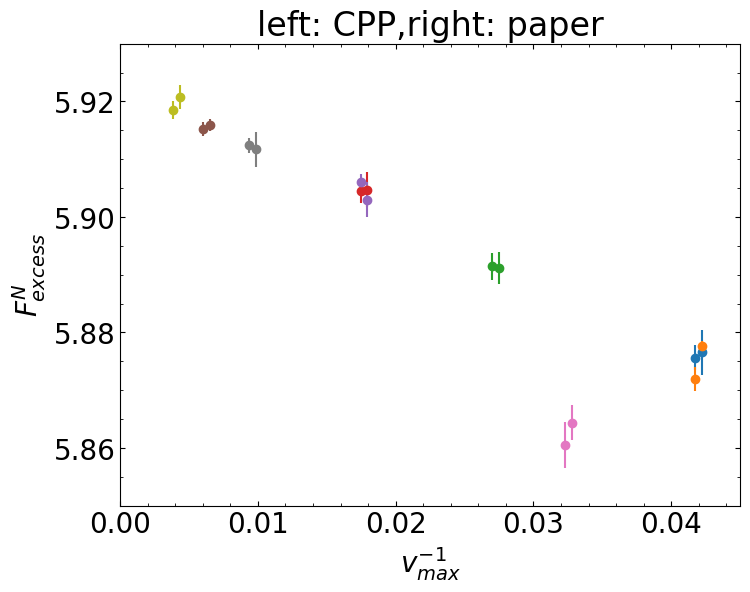

In [6]:
# FLFE-OriginalBox plot3
fig, axs = plt.subplots(figsize=(8, 6))

axs.set_title('left: CPP,right: paper')
axs.set_xlim(0, 0.045)
axs.set_ylim(5.85, 5.93)
axs.set_xlabel('$v_{max}^{-1}$')
axs.set_ylabel('$F_{excess}^{N}$')

# 9 可区分的颜色
colors = itertools.cycle(
    ['#1f77b4', '#ff7f0e', '#2ca02c',
     '#d62728', '#9467bd', '#8c564b',
     '#e377c2', '#7f7f7f', '#bcbd22']
)

delta = np.array(0.00025)

# 按照 lattice 分组，每分别绘制 errorbar
for lattice in data["lattice_name"].values.tolist():
    axs.errorbar(
        np.array(data[data["lattice_name"] == lattice]["v_max^-1"].values.tolist())-delta,
        np.array(data[data["lattice_name"] == lattice]["CPP F_excess^N"].values.tolist()),
        yerr=np.array(data[data["lattice_name"] == lattice]["CPP F_excess^N std"].values.tolist()),
        fmt='o', color=next(colors),
        label=lattice
    )

for lattice in data["lattice_name"].values.tolist():
    axs.errorbar(
        np.array(data[data["lattice_name"] == lattice]["v_max^-1"].values.tolist())+delta,
        data[data["lattice_name"] == lattice]["paper F_excess^N"].values.tolist(),
        yerr=data[data["lattice_name"] == lattice]["paper F_excess^N error"].values.tolist(),
        fmt='o', color=next(colors)
    )


# plt.legend(loc='lower left')
# plt.show()
plt.savefig("FLFE-OriginalBox.svg", bbox_inches='tight', format="svg")

In [ ]:
data = pd.read_csv("FLFE-OriginalBox.csv")
data = data[["lattice_name", "v_max^-1",
             "CPP F_excess^N", "CPP F_excess^N std",
             "paper F_excess^N", "paper F_excess^N error"]]

# without cubic 2
data = data[data["lattice_name"] != "fcc cubic 2"]

data

,lattice_name,v_max^-1,CPP F_excess^N,CPP F_excess^N std,paper F_excess^N,paper F_excess^N error
0,fcc 3x3x6,0.041968,5.875640,0.002138,5.8766,0.0039
1,fcc 3x3x12,0.041968,5.871966,0.002050,5.8777,0.0008
2,fcc 3x4x6,0.027259,5.891470,0.002323,5.8912,0.0028
3,fcc 4x4x6,0.017705,5.904431,0.001956,5.9047,0.0030
4,fcc 4x4x12,0.017705,5.905989,0.001505,5.9030,0.0030
5,fcc 6x6x6,0.006260,5.915224,0.001137,5.9159,0.0010
7,fcc cubic 3,0.009638,5.912437,0.001295,5.9117,0.0030
8,fcc cubic 4,0.004066,5.918467,0.001528,5.9208,0.0021


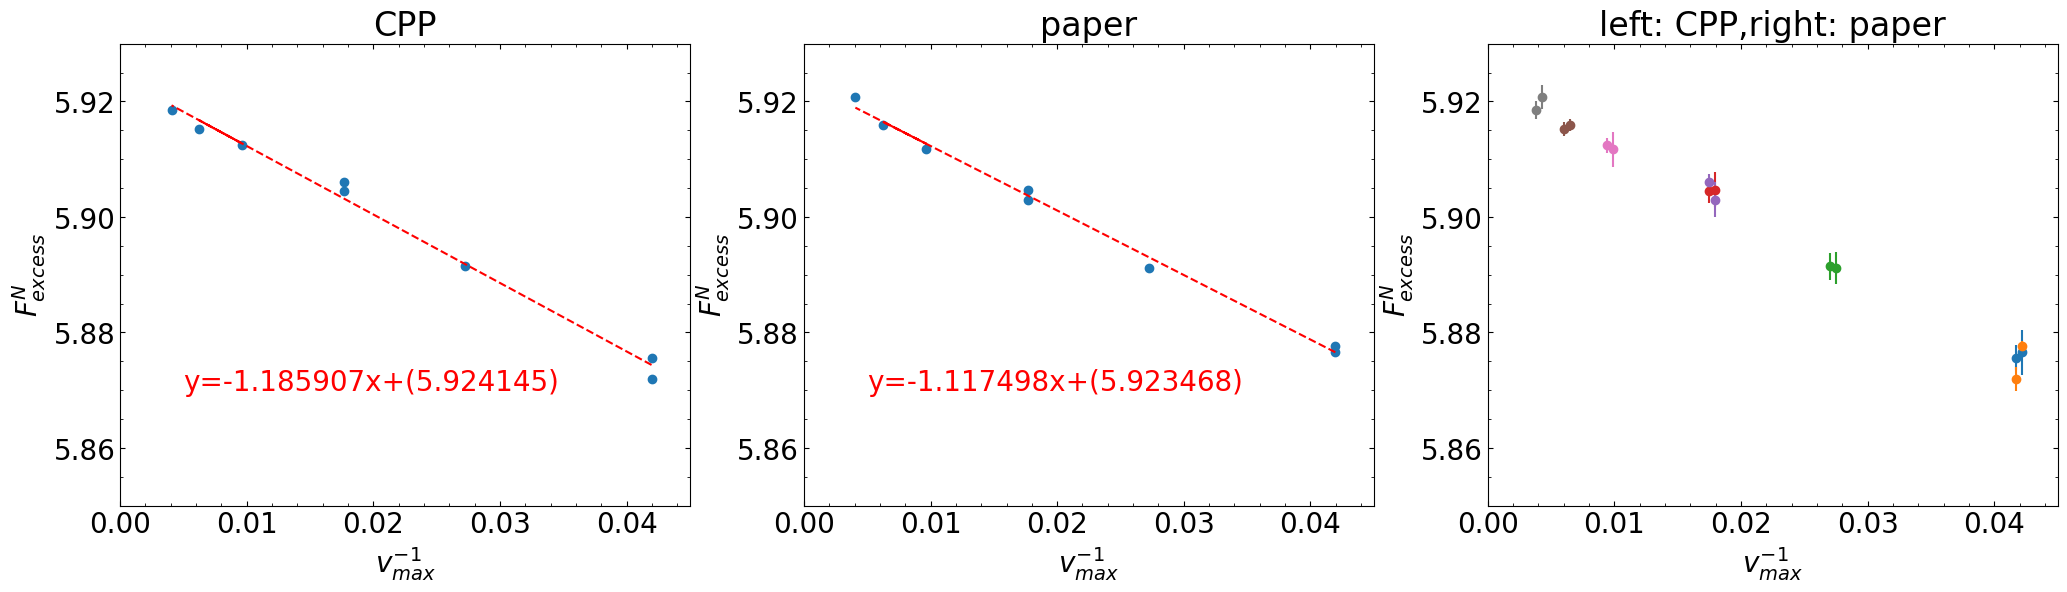

In [ ]:
# FLFE-OriginalBox-without cubic 2
fig, axs = plt.subplots(
    nrows=1, ncols=3,
    figsize=(25, 6)
)

# subplot1
axs[0].set_title('CPP')
axs[0].set_xlim(0, 0.045)
axs[0].set_ylim(5.85, 5.93)
axs[0].set_xlabel('$v_{max}^{-1}$')
axs[0].set_ylabel('$F_{excess}^{N}$')

axs[0].scatter(
    data["v_max^-1"].values.tolist(),
    data["CPP F_excess^N"].values.tolist()
)

z = np.polyfit(data["v_max^-1"], data["CPP F_excess^N"], 1)
p = np.poly1d(z)
axs[0].plot(data["v_max^-1"], p(data["v_max^-1"]), "r--")
axs[0].text(0.005, 5.87, "y=%.6fx+(%.6f)" % (z[0], z[1]), fontsize=20, color="r")


# subplot2
axs[1].set_title('paper')
axs[1].set_xlim(0, 0.045)
axs[1].set_ylim(5.85, 5.93)
axs[1].set_xlabel('$v_{max}^{-1}$')
axs[1].set_ylabel('$F_{excess}^{N}$')

axs[1].scatter(
    data["v_max^-1"].values.tolist(),
    data["paper F_excess^N"].values.tolist()
)

z = np.polyfit(data["v_max^-1"], data["paper F_excess^N"], 1)
p = np.poly1d(z)
axs[1].plot(data["v_max^-1"], p(data["v_max^-1"]), "r--")
axs[1].text(0.005, 5.87, "y=%.6fx+(%.6f)" % (z[0], z[1]), fontsize=20, color="r")


# subplot3
axs[2].set_title('left: CPP,right: paper')
axs[2].set_xlim(0, 0.045)
axs[2].set_ylim(5.85, 5.93)
axs[2].set_xlabel('$v_{max}^{-1}$')
axs[2].set_ylabel('$F_{excess}^{N}$')

# 8 可区分的颜色
colors = itertools.cycle(
    ['#1f77b4', '#ff7f0e', '#2ca02c',
     '#d62728', '#9467bd', '#8c564b',
     '#e377c2', '#7f7f7f']
)

delta = np.array(0.00025)

# 按照 lattice 分组，每分别绘制 errorbar
for lattice in data["lattice_name"].values.tolist():
    axs[2].errorbar(
        np.array(data[data["lattice_name"] == lattice]["v_max^-1"].values.tolist())-delta,
        np.array(data[data["lattice_name"] == lattice]["CPP F_excess^N"].values.tolist()),
        yerr=np.array(data[data["lattice_name"] == lattice]["CPP F_excess^N std"].values.tolist()),
        fmt='o', color=next(colors),
        label=lattice
    )

for lattice in data["lattice_name"].values.tolist():
    axs[2].errorbar(
        np.array(data[data["lattice_name"] == lattice]["v_max^-1"].values.tolist())+delta,
        data[data["lattice_name"] == lattice]["paper F_excess^N"].values.tolist(),
        yerr=data[data["lattice_name"] == lattice]["paper F_excess^N error"].values.tolist(),
        fmt='o', color=next(colors)
    )


# plt.legend(loc='lower left')
plt.show()
# plt.savefig("FLFE-OriginalBox-without-cubic-2.svg", bbox_inches='tight', format="svg")

In [ ]:
data = pd.read_csv("FLFE-MyBox.csv")
data = data[["lattice_name", "v_max^-1",
             "CPP F_excess^N", "CPP F_excess^N std",
             "paper F_excess^N", "paper F_excess^N error"]]

data

,lattice_name,v_max^-1,CPP F_excess^N,CPP F_excess^N std,paper F_excess^N,paper F_excess^N error
0,fcc 3x3x6,0.027259,5.884779,0.002598,5.8766,0.0039
1,fcc 3x3x12,0.027259,5.893275,0.002221,5.8777,0.0008
2,fcc 3x4x6,0.027259,5.895014,0.004319,5.8912,0.0028
3,fcc 4x4x6,0.011500,5.905761,0.002216,5.9047,0.0030
4,fcc 4x4x12,0.011500,5.911154,0.001993,5.9030,0.0030
5,fcc 6x6x6,0.009638,5.914797,0.001475,5.9159,0.0010


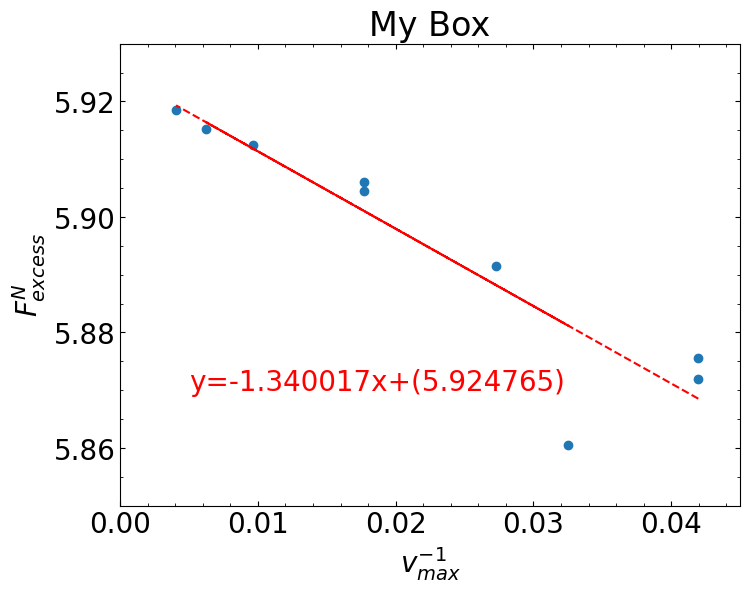

In [8]:
# FLFE-MyBox
fig, axs = plt.subplots(figsize=(8, 6))

axs.set_title('My Box')
axs.set_xlim(0, 0.045)
axs.set_ylim(5.85, 5.93)
axs.set_xlabel('$v_{max}^{-1}$')
axs.set_ylabel('$F_{excess}^{N}$')

axs.scatter(
    data["v_max^-1"].values.tolist(),
    data["CPP F_excess^N"].values.tolist()
)

z = np.polyfit(data["v_max^-1"], data["CPP F_excess^N"], 1)
p = np.poly1d(z)
axs.plot(data["v_max^-1"], p(data["v_max^-1"]), "r--")
axs.text(0.005, 5.87, "y=%.6fx+(%.6f)" % (z[0], z[1]), fontsize=20, color="r")


# plt.legend(loc='lower left')
# plt.show()
plt.savefig("FLFE-MyBox.svg", bbox_inches='tight', format="svg")